# DoubleGlovo: Analysis

## Analysis

### Imports

In [2]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('c:\\Users\\Jordi Cremades\\Documents\\Repository')

from Utilities import query_engines

### Queries

In [4]:
# Query Delta Time
query = query_engines.QueryEngines(
    query='delta_time.sql', 
    del1='--v1', 
    del2='--endv1',
    params=None,
    load_from_output_file='delta_time',
    output_file='delta_time',
    printq=None
)

df_delta_time = query.query_run_starbust()

# Query Delta Time
query = query_engines.QueryEngines(
    query='dynamic_sessions.sql', 
    del1='--v1', 
    del2='--endv1',
    params=None,
    load_from_output_file='dynamic_sessions',
    output_file='dynamic_sessions',
    printq=None
)

df_dynamic_sessions = query.query_run_starbust()

# Query Delta Time
query = query_engines.QueryEngines(
    query='delta_time.sql', 
    del1='--v1', 
    del2='--endv1',
    params=None,
    load_from_output_file='food_cvr',
    output_file='food_cvr',
    printq=None
)

df_food_cvr = query.query_run_starbust()

### Delta Time Analysis

In [5]:
# Summary delta_time dataframe
print('There are {} rows in the dataframe'.format(len(df_delta_time)))
print('There are {} distinct groceries orders'.format(df_delta_time['grocery_order_id'].nunique()))
print('There are {} distinct food orders'.format(df_delta_time['food_order_id'].nunique()))
print('Min Date = {} distinct groceries orders'.format(df_delta_time['p_creation_date'].min()))
print('Max Date = {} distinct groceries orders'.format(df_delta_time['p_creation_date'].max()))

There are 512085 rows in the dataframe
There are 424813 distinct groceries orders
There are 451900 distinct food orders
Min Date = 2023-10-21 distinct groceries orders
Max Date = 2023-11-17 distinct groceries orders


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


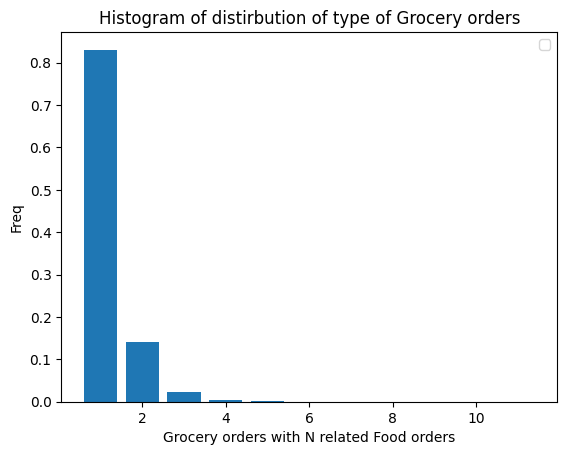

In [6]:
# Groceries orders with multipe Food orders related
groceries_multiple_f = df_delta_time.groupby('grocery_order_id').size().reset_index(name='order_count')
distrib_groceries_multiple_f = groceries_multiple_f.groupby('order_count').size().reset_index(name='distrib')

distrib_groceries_multiple_f['freq'] = distrib_groceries_multiple_f['distrib']/distrib_groceries_multiple_f['distrib'].sum()
plt.bar(distrib_groceries_multiple_f['order_count'],distrib_groceries_multiple_f['freq'])
plt.xlabel('Grocery orders with N related Food orders')
plt.ylabel('Freq')
plt.title('Histogram of distirbution of type of Grocery orders')
plt.legend()
plt.show()


In [23]:
# Most of the orders only have one related food order. For deeper analysis, I should keep the time that is the smallest. 
# The reason behind it, is that F1,F2,F3-->G. Tiene que ser solo F3 la que puede influir en el comporatmiento del usuario
# para comprar la Groceries order.
groceries_multiple_f = df_delta_time.groupby('grocery_order_id').size().reset_index(name='order_count')
cond = groceries_multiple_f['order_count'] == 1 
groceries_one_f = groceries_multiple_f[cond] 

In [27]:
# 
groceries_one_f

,grocery_order_id,order_count
0,719944602,1
1,719944619,1
2,719944650,1
3,719944712,1
4,719945549,1
...,...,...
424808,100247755725,1
424809,100247755885,1
424810,100247758602,1
424811,100247759702,1


In [25]:

delta_time_one = pd.merge

KeyError: 'order_id'

## Analyisis

### Imports

In [1]:
import sys
import pandas as pd
import numpy as np
import causalimpact as ci
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

sys.path.append('c:\\Users\\Jordi Cremades\\Documents\\Repository')

from Utilities import query_engines

### Configuration Load

In [2]:
configuration_load_df = pd.read_csv('inputs/SPM_store_addresses_configuration.csv')
print('There are {} distinct store addresses'.format(configuration_load_df['order_descriptors.store_address_id'].nunique()))
configuration_load_df.rename(columns={'order_descriptors.store_address_id': 'store_address_id'}, inplace=True)
configuration_load_df

There are 482 distinct store addresses


,store_address_id,Group
0,603358,Treat
1,598511,Treat
2,595140,Treat
3,594208,Treat
4,589044,Treat
...,...,...
477,51523,Treat
478,22601,Treat
479,5653,Treat
480,238,Treat


### Enrich Dataframe

In [3]:
# Query de data of the store addresses

# Parameters
start_date = '2023-07-10'
end_date = '2023-09-30'
store_addresses = ",".join(str(val) for val in configuration_load_df['store_address_id'].unique().tolist())
params = [
    {'name':'store_addresses', 'value':store_addresses}
    ,{'name':'start_date', 'value':start_date}
    ,{'name':'end_date', 'value':end_date}
]

# Query
query = query_engines.QueryEngines(
    query='SPM/SPM_synthetic.sql', 
    del1='--v3', 
    del2='--end_v3',
    params=params,
    load_from_output_file='pna_data',
    output_file='pna_data',
    printq=None
)

enrich_df = query.query_run_starbust()

print('There are {} distinct dates'.format(enrich_df['order_descriptors.order_activated_local_date'].nunique()))
print("Min Date = {}".format(enrich_df['order_descriptors.order_activated_local_date'].min()))
print("Max Date = {}".format(enrich_df['order_descriptors.order_activated_local_date'].max()))
print('There are {} store addresses'.format(enrich_df['order_descriptors.store_address_id'].nunique()))
enrich_df.head()

There are 83 distinct dates
Min Date = 2023-07-10
Max Date = 2023-09-30
There are 482 store addresses


,order_descriptors.store_address_id,order_descriptors.order_activated_local_date,number_of_products_with_pna,number_of_placed_products,number_of_orders,number_of_delivered_orders,total_quantity_placed,products_value_placed
0,603358,2023-09-23,22,550,64,62,1247,1065.822581
1,603358,2023-09-13,25,297,38,37,714,623.242319
2,603358,2023-09-03,8,271,29,27,629,408.691906
3,603358,2023-07-10,18,310,41,38,896,652.367842
4,603358,2023-09-25,5,323,51,50,830,745.978639


In [4]:
# Merge with previous information
test = pd.merge(enrich_df,configuration_load_df, left_on=['order_descriptors.store_address_id'], right_on=['store_address_id'], how='left')
test = test.drop(['store_address_id'], axis=1)

# Rename columns
test = test.rename(columns={'order_descriptors.store_address_id': 'store_address_id'
                            ,'order_descriptors.order_activated_local_date':'activated_local_date'
                            ,'number_of_orders': 'n_orders'
                            ,'number_of_delivered_orders': 'do_orders'
                            ,'number_of_products_with_pna': 'n_products_with_pna'
                            ,'number_of_placed_products': 'n_products_placed'
                            ,'count_product_id': 'n_products_deactivated'
                            ,'total_quantity_placed': 'quantity'})

# Define metrics
test['perc_products_pna'] = test['n_products_with_pna']/test['n_products_placed']
test['UIPO'] = test['n_products_placed']/test['n_orders']
test


,store_address_id,activated_local_date,n_products_with_pna,n_products_placed,n_orders,do_orders,quantity,products_value_placed,Group,perc_products_pna,UIPO
0,603358,2023-09-23,22,550,64,62,1247,1065.822581,Treat,0.040000,8.593750
1,603358,2023-09-13,25,297,38,37,714,623.242319,Treat,0.084175,7.815789
2,603358,2023-09-03,8,271,29,27,629,408.691906,Treat,0.029520,9.344828
3,603358,2023-07-10,18,310,41,38,896,652.367842,Treat,0.058065,7.560976
4,603358,2023-09-25,5,323,51,50,830,745.978639,Treat,0.015480,6.333333
...,...,...,...,...,...,...,...,...,...,...,...
37548,187,2023-08-14,3,88,11,11,138,292.940000,Treat,0.034091,8.000000
37549,187,2023-08-16,4,87,9,8,113,269.930000,Treat,0.045977,9.666667
37550,187,2023-09-27,9,82,10,8,109,294.190000,Treat,0.109756,8.200000
37551,187,2023-07-24,11,97,15,14,159,362.500000,Treat,0.113402,6.466667


In [5]:
# For each pair of dates we analyse how many days passed by
date_start = datetime.strptime('2023-09-20', '%Y-%m-%d')
date_end = datetime.strptime('2023-09-30', '%Y-%m-%d')

days_difference = (date_end - date_start).days
print(days_difference+1)

11


### Data Exploration: Density of Store addresses activities

In [6]:
test_store_address_activity_days = test.groupby(['store_address_id','Group']).size().reset_index()
test_store_address_activity_days.rename(columns={0: 'n_days_operating'}, inplace=True)
test_store_address_activity_days['perc_activity'] = test_store_address_activity_days['n_days_operating']/test['activated_local_date'].nunique()
test_store_address_activity_days

,store_address_id,Group,n_days_operating,perc_activity
0,187,Treat,83,1.000000
1,238,Treat,78,0.939759
2,5653,Treat,81,0.975904
3,22601,Treat,80,0.963855
4,51523,Treat,83,1.000000
...,...,...,...,...
477,589044,Treat,82,0.987952
478,594208,Treat,62,0.746988
479,595140,Treat,83,1.000000
480,598511,Treat,47,0.566265


Text(0.5, 1.0, 'Treat')

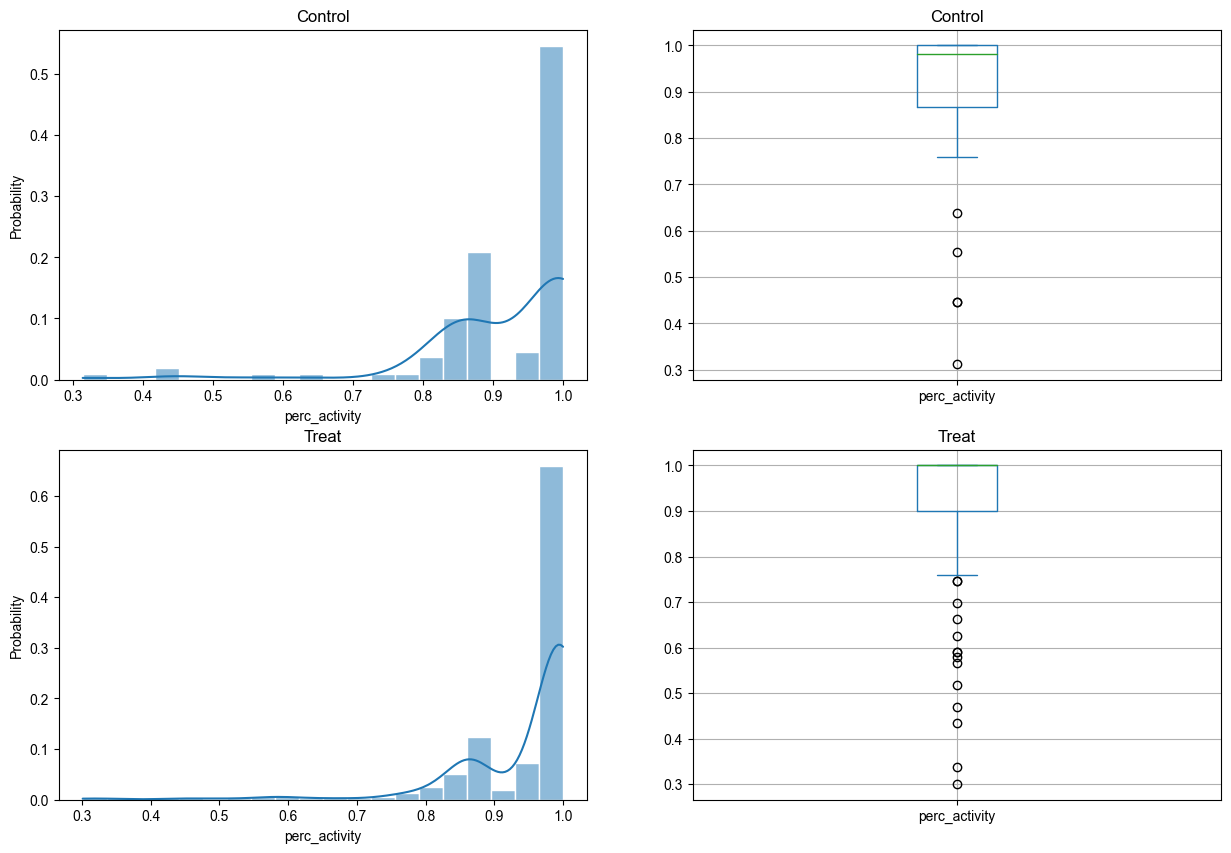

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Control
sns.set_style("whitegrid")
sns.histplot(data=test_store_address_activity_days[test_store_address_activity_days['Group'] == 'Control'], x='perc_activity', bins=20, kde=True, ax=axes[0][0], stat='probability')
axes[0][0].set_title('Control')
test_store_address_activity_days[test_store_address_activity_days['Group'] == 'Control']['perc_activity'].plot.box(ax=axes[0][1])
axes[0][1].set_title('Control')

# Treat
sns.set_style("whitegrid")
sns.histplot(data=test_store_address_activity_days[test_store_address_activity_days['Group'] == 'Treat'], x='perc_activity', bins=20, kde=True, ax=axes[1][0], stat='probability')
axes[1][0].set_title('Treat')
test_store_address_activity_days[test_store_address_activity_days['Group'] == 'Treat']['perc_activity'].plot.box(ax=axes[1][1])
axes[1][1].set_title('Treat')

In [8]:
# Parameters
test_store_address_activity_days[test_store_address_activity_days['Group'] == 'Treat']['perc_activity'].describe()

count    372.000000
mean       0.944617
std        0.100272
min        0.301205
25%        0.900602
50%        1.000000
75%        1.000000
max        1.000000
Name: perc_activity, dtype: float64

In [9]:
# Parameters
test_store_address_activity_days[test_store_address_activity_days['Group'] == 'Control']['perc_activity'].describe()

count    110.000000
mean       0.918620
std        0.121672
min        0.313253
25%        0.867470
50%        0.981928
75%        1.000000
max        1.000000
Name: perc_activity, dtype: float64

### Data Exploration: Consistency of Split distribution accross dates

In [10]:
# Is there any null or NA
test.isna().sum()

store_address_id         0
activated_local_date     0
n_products_with_pna      0
n_products_placed        0
n_orders                 0
do_orders                0
quantity                 0
products_value_placed    0
Group                    0
perc_products_pna        0
UIPO                     0
dtype: int64

There is no data missing, OK

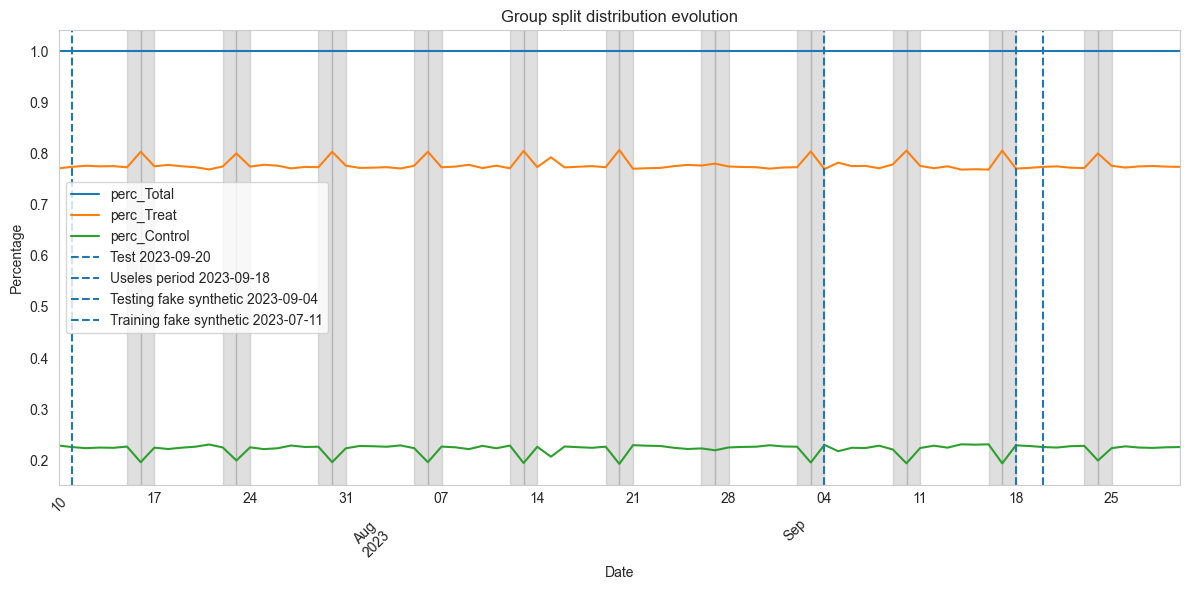

In [11]:
# What is the distribution of Control and Treat group per day
test_grouped_by = test.groupby(['activated_local_date', 'Group']).size().reset_index(name='count')
test_pivot = test_grouped_by.pivot(index='activated_local_date', columns='Group', values='count')

# To add vertical lines in time series, better to first turn into datetime
test_pivot.index = pd.to_datetime(test_pivot.index)

# Add weekends 
test_pivot['day_of_week'] = test_pivot.index.day_name()

# Calculations
test_pivot['Total'] = test_pivot['Treat'] + test_pivot['Control']
test_pivot['perc_Control'] = test_pivot['Control']/test_pivot['Total']
test_pivot['perc_Treat'] = test_pivot['Treat']/test_pivot['Total']
test_pivot['perc_Total'] = test_pivot['perc_Control'] + test_pivot['perc_Treat']

fig, ax = plt.subplots(figsize=(12,6))


test_pivot['perc_Total'].plot(ax=ax,label='perc_Total')
test_pivot['perc_Treat'].plot(ax=ax,label='perc_Treat')
test_pivot['perc_Control'].plot(ax=ax,label='perc_Control')

# Add a vertical line on a specific date
specific_date = "2023-09-20"
ax.axvline(pd.Timestamp(specific_date), linestyle='--', label=f'Test {specific_date}')
specific_date = "2023-09-18"
ax.axvline(pd.Timestamp(specific_date), linestyle='--', label=f'Useles period {specific_date}')
specific_date = "2023-09-04"
ax.axvline(pd.Timestamp(specific_date), linestyle='--', label=f'Testing fake synthetic {specific_date}')
specific_date = "2023-07-11"
ax.axvline(pd.Timestamp(specific_date), linestyle='--', label=f'Training fake synthetic {specific_date}')


# Highlighting weekends
for date in test_pivot.index:
    if date.day_name() in ['Saturday', 'Sunday']:
        ax.axvspan(date, date + pd.Timedelta(days=1), color='grey', alpha=0.25)


plt.xlabel('Date')
plt.ylabel('Percentage')
plt.title('Group split distribution evolution')
ax.legend()
ax.grid(False)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.tight_layout()  # Adjust layout for better visibility
plt.show()

### Consistency with perc pna and UIPO group selection

C:\Users\Jordi Cremades\AppData\Local\Temp\ipykernel_23344\4181766064.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  test_grouped = test.groupby(['activated_local_date', 'Group'])['n_orders','n_products_placed','n_products_with_pna'].sum().reset_index()
c:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\lib\site-packages\statsmodels\base\optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: standardize, nseasons. After release 0.14, this will raise.
  warnings.warn(
c:\anaconda3\lib\site-packages\statsmodels\tsa

p_value 0.4805194805194805


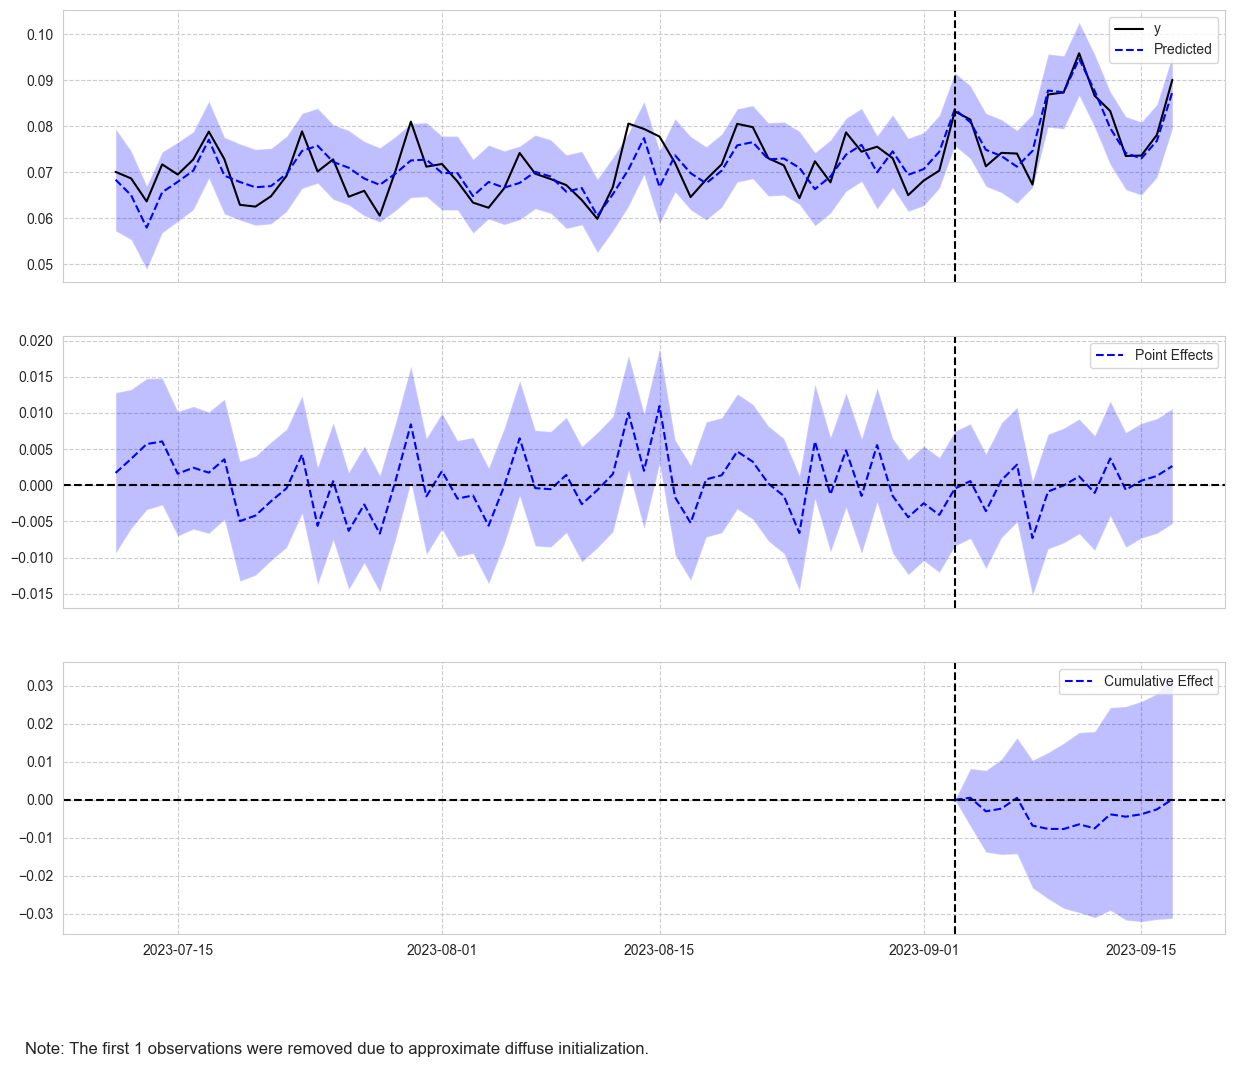

In [12]:
# Parameters
start_pre = "2023-07-10"; end_pre = "2023-09-03"
start_post = "2023-09-04"; end_post = "2023-09-17"
pre_period = [pd.to_datetime(date) for date in [start_pre, end_pre]]
post_period = [pd.to_datetime(date) for date in [start_post, end_post]]
column_to_analyse = 'perc_products_pna'

# Computing the final metrics
test_grouped = test.groupby(['activated_local_date', 'Group'])['n_orders','n_products_placed','n_products_with_pna'].sum().reset_index()
test_grouped['perc_products_pna'] = test_grouped['n_products_with_pna']/test_grouped['n_products_placed']
test_grouped['UIPO'] = test_grouped['n_products_placed']/test_grouped['n_orders']

# Pivot before test
test_grouped_pivoted = test_grouped.pivot(index='activated_local_date', columns='Group', values=column_to_analyse)
model = ci.CausalImpact(test_grouped_pivoted[['Control', 'Treat']],pre_period,post_period)

# Model
print('p_value {}'.format(model.p_value))
model.plot()

c:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\lib\site-packages\statsmodels\base\optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: standardize, nseasons. After release 0.14, this will raise.
  warnings.warn(
c:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


p_value 0.0


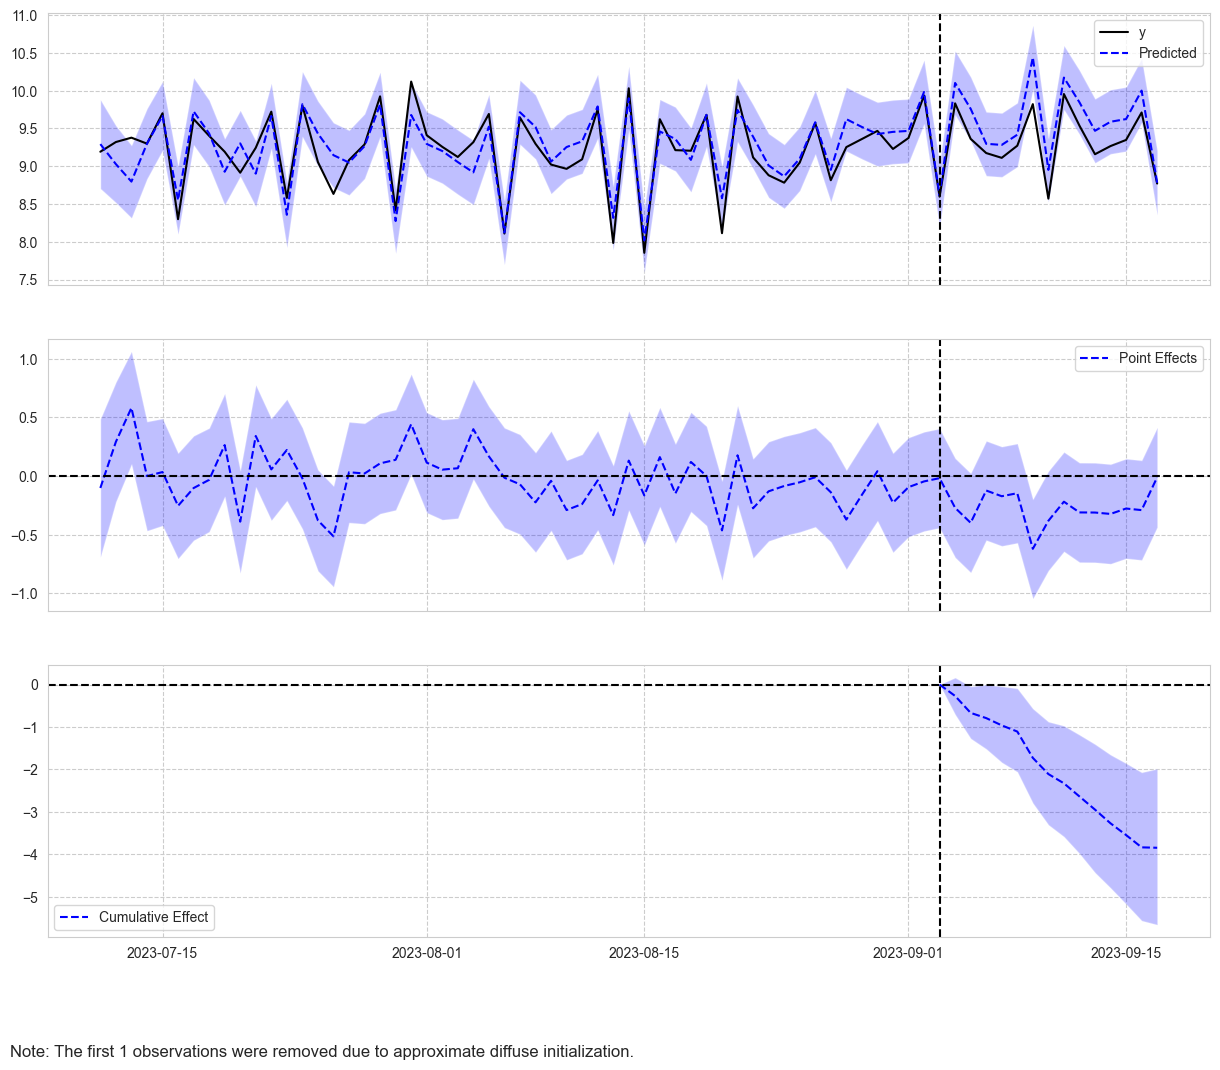

In [13]:
column_to_analyse = 'UIPO'

# Pivot before test
test_grouped_pivoted = test_grouped.pivot(index='activated_local_date', columns='Group', values=column_to_analyse)
model = ci.CausalImpact(test_grouped_pivoted[['Control', 'Treat']],pre_period,post_period)

# Model
print('p_value {}'.format(model.p_value))
model.plot()

### Q: Are we improving % pna

C:\Users\Jordi Cremades\AppData\Local\Temp\ipykernel_23344\3581705231.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  test_grouped = test.groupby(['activated_local_date', 'Group'])['n_orders','n_products_placed','n_products_with_pna'].sum().reset_index()
c:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\lib\site-packages\statsmodels\base\optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: standardize, nseasons. After release 0.14, this will raise.
  warnings.warn(
c:\anaconda3\lib\site-packages\statsmodels\tsa

p_value 0.002997002997002997
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 93083.55. By contrast, in the absence of an
intervention, we would have expected an average response of 90478.06.
The 95% interval of this counterfactual prediction is [88691.51, 92272.76].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 2605.49 with a 95% interval of
[810.78, 4392.03]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 1023919.0.
By contrast, had the intervention not taken place, we would have expected
a sum of 995258.61. The 95% interval of this prediction is [975606.66, 1015000.38].


The above results are given in terms 

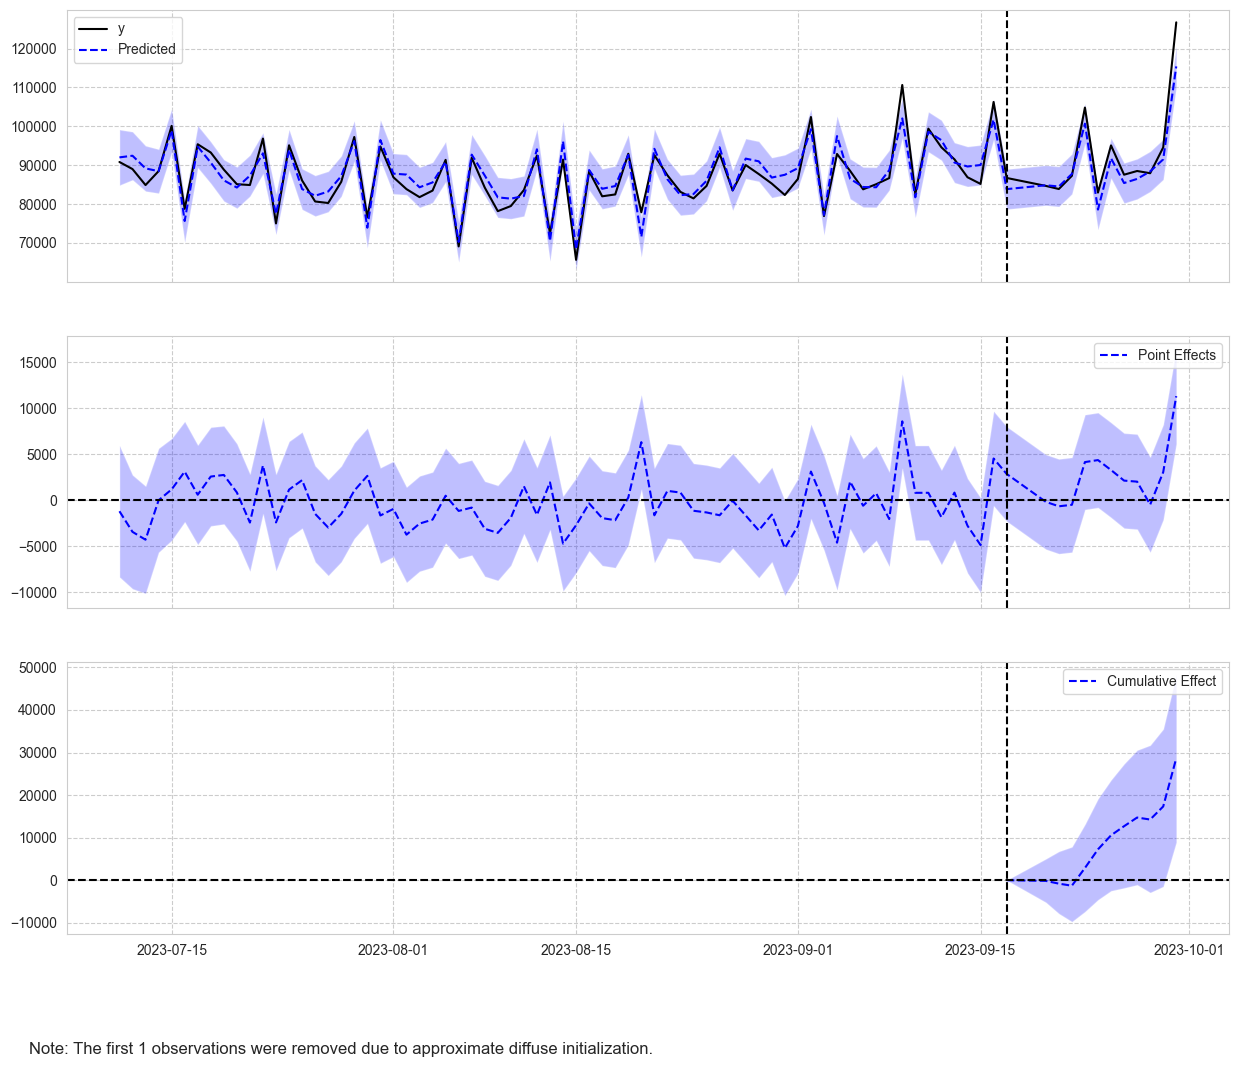

In [15]:
# Parameters
start_pre = "2023-07-10"; end_pre = "2023-09-17"
start_post = "2023-09-20"; end_post = "2023-09-30"
pre_period = [pd.to_datetime(date) for date in [start_pre, end_pre]]
post_period = [pd.to_datetime(date) for date in [start_post, end_post]]
column_to_analyse = 'n_products_placed'

# Computing the final metrics
test_grouped = test.groupby(['activated_local_date', 'Group'])['n_orders','n_products_placed','n_products_with_pna'].sum().reset_index()
test_grouped['perc_products_pna'] = test_grouped['n_products_with_pna']/test_grouped['n_products_placed']
test_grouped['UIPO'] = test_grouped['n_products_placed']/test_grouped['n_orders']

# Pivot before test
test_grouped_pivoted = test_grouped.pivot(index='activated_local_date', columns='Group', values=column_to_analyse)
model = ci.CausalImpact(test_grouped_pivoted[['Treat', 'Control']],pre_period,post_period)

# Model
print('p_value {}'.format(model.p_value))
print(model.summary('report'))
model.plot()

C:\Users\Jordi Cremades\AppData\Local\Temp\ipykernel_23344\772384505.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  test_grouped = test.groupby(['activated_local_date', 'Group'])['n_orders','n_products_placed','n_products_with_pna'].sum().reset_index()
c:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\lib\site-packages\statsmodels\base\optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: standardize, nseasons. After release 0.14, this will raise.
  warnings.warn(
c:\anaconda3\lib\site-packages\statsmodels\tsa\

p_value 0.16183816183816183
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 5569.0. In the absence of an
intervention, we would have expected an average response of 5673.27.
The 95% interval of this counterfactual prediction is [5469.16, 5881.01].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -104.27 with a 95% interval of
[-312.01, 99.84]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 61259.0.
Had the intervention not taken place, we would have expected
a sum of 62405.96. The 95% interval of this prediction is [60160.73, 64691.15].


The above results are given in terms of absolute numbers. In relative
terms,

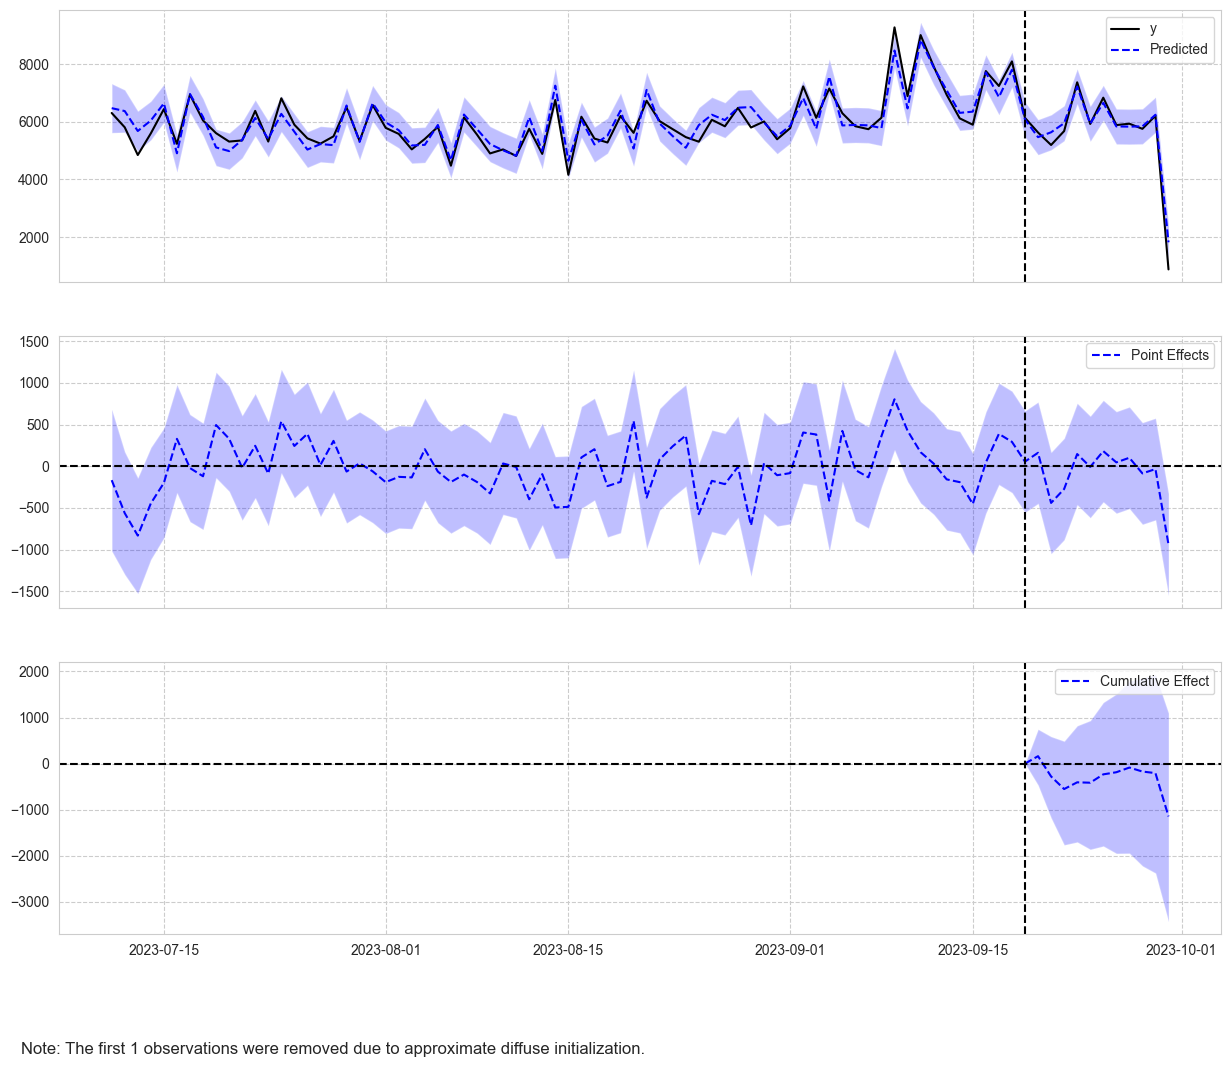

In [16]:
# Parameters
start_pre = "2023-07-10"; end_pre = "2023-09-19"
start_post = "2023-09-20"; end_post = "2023-09-30"
pre_period = [pd.to_datetime(date) for date in [start_pre, end_pre]]
post_period = [pd.to_datetime(date) for date in [start_post, end_post]]
column_to_analyse = 'n_products_with_pna'

# Computing the final metrics
test_grouped = test.groupby(['activated_local_date', 'Group'])['n_orders','n_products_placed','n_products_with_pna'].sum().reset_index()
test_grouped['perc_products_pna'] = test_grouped['n_products_with_pna']/test_grouped['n_products_placed']
test_grouped['UIPO'] = test_grouped['n_products_placed']/test_grouped['n_orders']

# Pivot before test
test_grouped_pivoted = test_grouped.pivot(index='activated_local_date', columns='Group', values=column_to_analyse)
model = ci.CausalImpact(test_grouped_pivoted[['Treat', 'Control']],pre_period,post_period)

# Model
print('p_value {}'.format(model.p_value))
print(model.summary('report'))
model.plot()

C:\Users\Jordi Cremades\AppData\Local\Temp\ipykernel_23344\901642521.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  test_grouped = test.groupby(['activated_local_date', 'Group'])['n_orders','n_products_placed','n_products_with_pna'].sum().reset_index()
c:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\lib\site-packages\statsmodels\base\optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: standardize, nseasons. After release 0.14, this will raise.
  warnings.warn(
c:\anaconda3\lib\site-packages\statsmodels\tsa\

p_value 0.001998001998001998
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 0.06. By contrast, in the absence of an
intervention, we would have expected an average response of 0.06.
The 95% interval of this counterfactual prediction is [0.06, 0.07].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -0.0 with a 95% interval of
[-0.0, -0.0]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 0.68.
By contrast, had the intervention not taken place, we would have expected
a sum of 0.71. The 95% interval of this prediction is [0.69, 0.73].


The above results are given in terms of absolute numbers. In relative
terms, the r

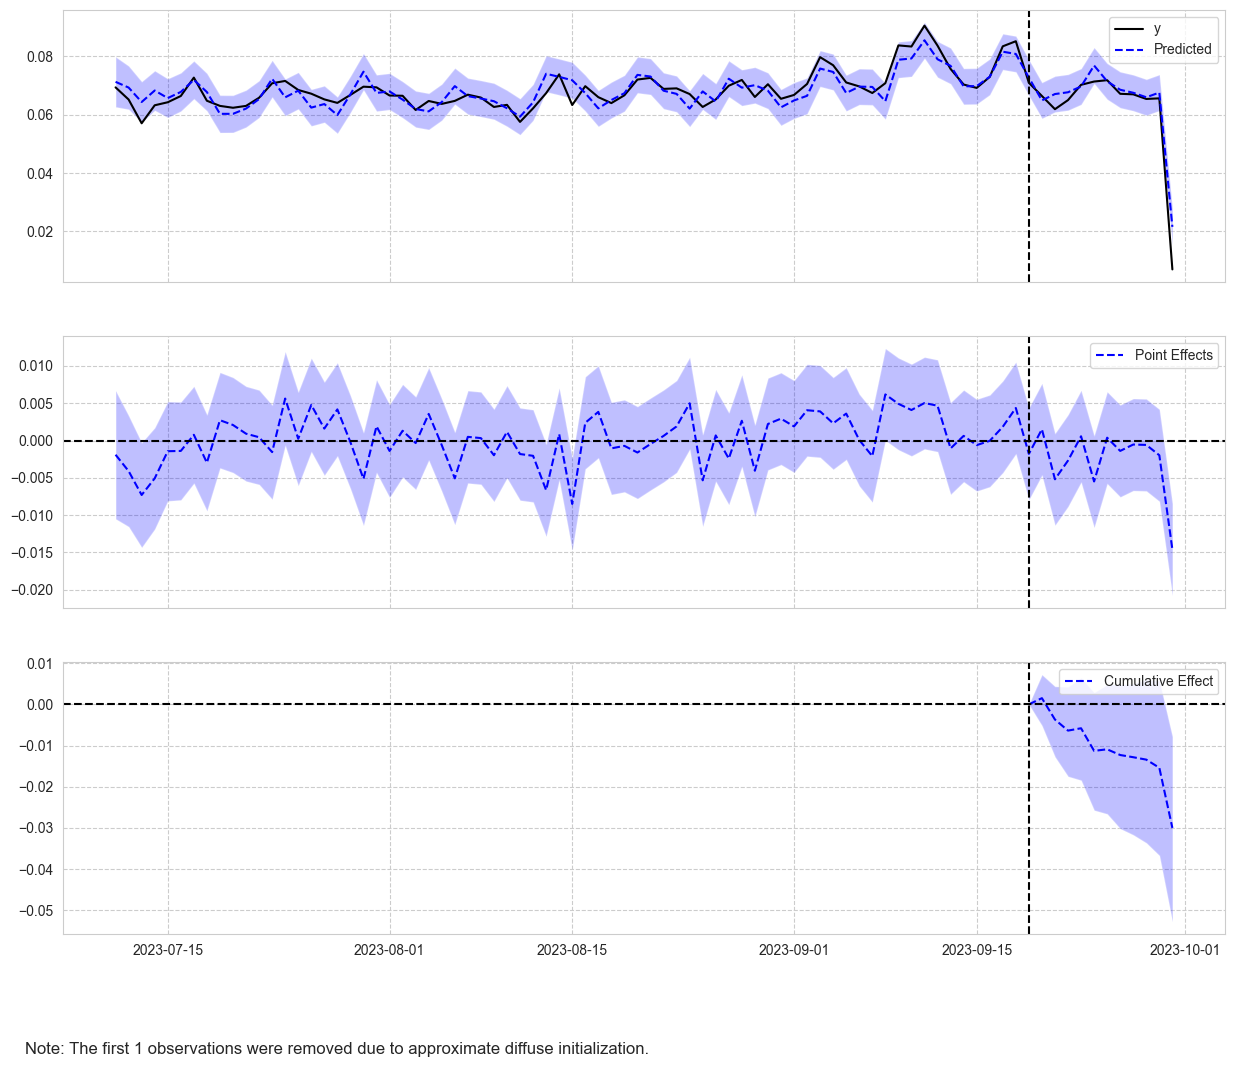

In [17]:
# Parameters
start_pre = "2023-07-10"; end_pre = "2023-09-19"
start_post = "2023-09-20"; end_post = "2023-09-30"
pre_period = [pd.to_datetime(date) for date in [start_pre, end_pre]]
post_period = [pd.to_datetime(date) for date in [start_post, end_post]]
column_to_analyse = 'perc_products_pna'

# Computing the final metrics
test_grouped = test.groupby(['activated_local_date', 'Group'])['n_orders','n_products_placed','n_products_with_pna'].sum().reset_index()
test_grouped['perc_products_pna'] = test_grouped['n_products_with_pna']/test_grouped['n_products_placed']
test_grouped['UIPO'] = test_grouped['n_products_placed']/test_grouped['n_orders']

# Pivot before test
test_grouped_pivoted = test_grouped.pivot(index='activated_local_date', columns='Group', values=column_to_analyse)
model = ci.CausalImpact(test_grouped_pivoted[['Treat', 'Control']],pre_period,post_period)

# Model
print('p_value {}'.format(model.p_value))
print(model.summary('report'))
model.plot()

C:\Users\Jordi Cremades\AppData\Local\Temp\ipykernel_23344\2231577527.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  test_grouped = test.groupby(['activated_local_date', 'Group'])['n_orders','n_products_placed','n_products_with_pna'].sum().reset_index()
c:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\lib\site-packages\statsmodels\base\optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: standardize, nseasons. After release 0.14, this will raise.
  warnings.warn(
c:\anaconda3\lib\site-packages\statsmodels\tsa

p_value 0.09090909090909091
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 10187.0. In the absence of an
intervention, we would have expected an average response of 10049.28.
The 95% interval of this counterfactual prediction is [9849.39, 10267.12].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 137.72 with a 95% interval of
[-80.12, 337.61]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 112057.0.
Had the intervention not taken place, we would have expected
a sum of 110542.04. The 95% interval of this prediction is [108343.3, 112938.34].


The above results are given in terms of absolute numbers. In relative
t

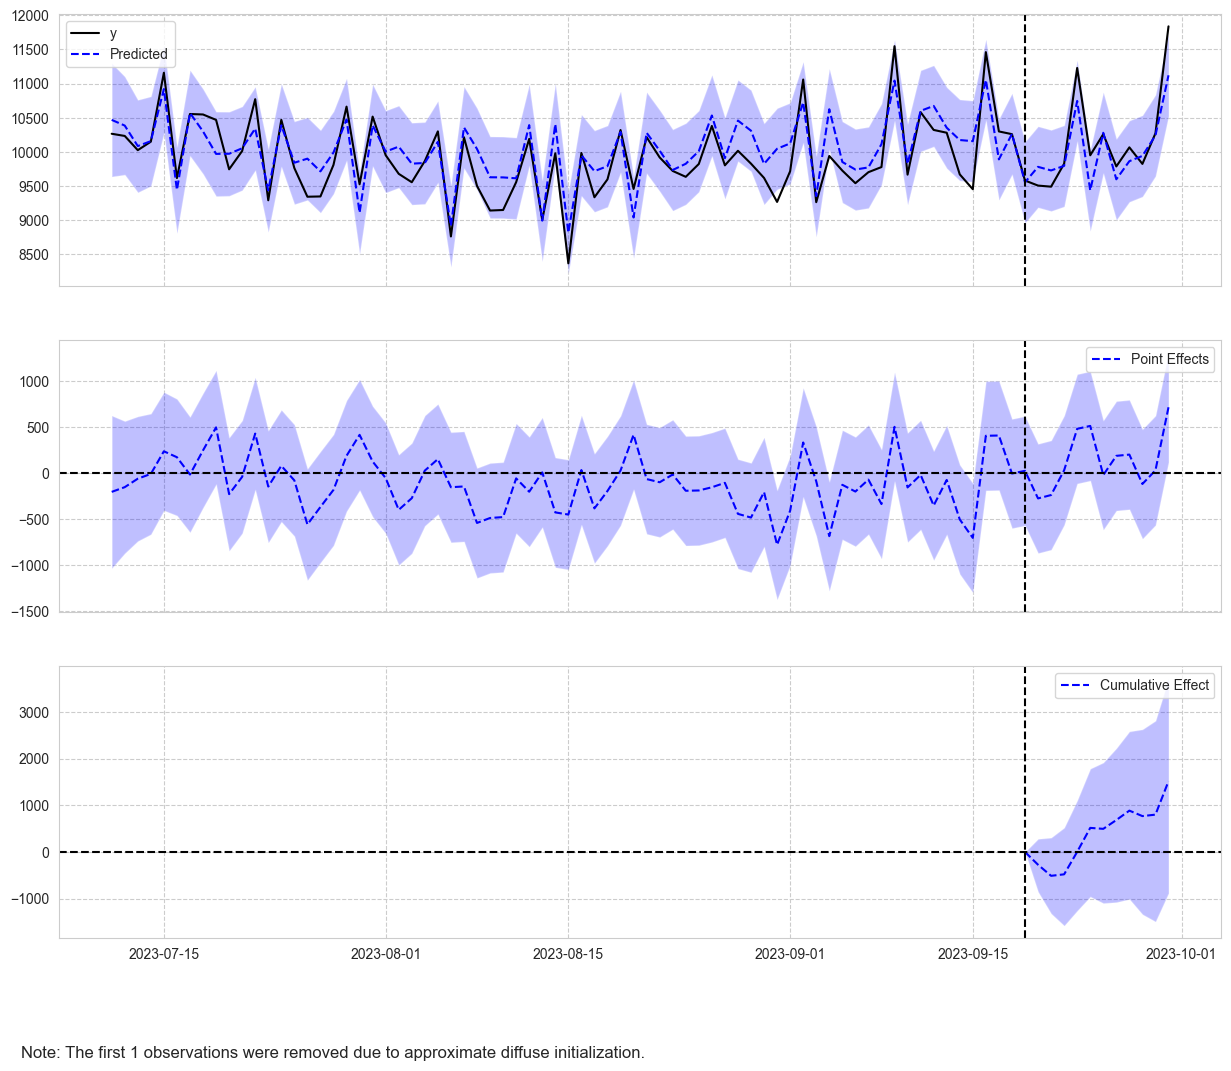

In [18]:
# Parameters
start_pre = "2023-07-10"; end_pre = "2023-09-19"
start_post = "2023-09-20"; end_post = "2023-09-30"
pre_period = [pd.to_datetime(date) for date in [start_pre, end_pre]]
post_period = [pd.to_datetime(date) for date in [start_post, end_post]]
column_to_analyse = 'n_orders'

# Computing the final metrics
test_grouped = test.groupby(['activated_local_date', 'Group'])['n_orders','n_products_placed','n_products_with_pna'].sum().reset_index()
test_grouped['perc_products_pna'] = test_grouped['n_products_with_pna']/test_grouped['n_products_placed']
test_grouped['UIPO'] = test_grouped['n_products_placed']/test_grouped['n_orders']

# Pivot before test
test_grouped_pivoted = test_grouped.pivot(index='activated_local_date', columns='Group', values=column_to_analyse)
model = ci.CausalImpact(test_grouped_pivoted[['Treat', 'Control']],pre_period,post_period)

# Model
print('p_value {}'.format(model.p_value))
print(model.summary('report'))
model.plot()

### How many products did the SPM disable during the test?

In [19]:
def read_excel_with_date(filename):
    # Read the Excel file into a DataFrame
    df = pd.read_excel(filename)
    
    # Extract the date from the file name
    date_str = os.path.basename(filename).split('_')[0]
    df['Date'] = pd.to_datetime(date_str, format='%Y%m%d')
    
    return df

# Get list of filenames in directory that match the pattern
path = 'inputs/disabled_products/'
filenames = [os.path.join(path, f) for f in os.listdir(path) if f.endswith(".xlsx")]

# Read each file and store the DataFrames in a list
dfs = [read_excel_with_date(filename) for filename in filenames]

# Concatenate all the DataFrames in the list into a single DataFrame
df_products_disabled = pd.concat(dfs, ignore_index=True)

# Delete timestamp useless column
df_products_disabled.drop('timestamp', axis=1, inplace=True)

# To count the distinct product ids that may appear in multiple rows we 
# use the following 2 lines
df_products_disabled['product_id_partner'] = df_products_disabled['product_id_partner'].str.split(',')
df_products_disabled = df_products_disabled.explode('product_id_partner')

# Finally group by the final result
df_products_disabled_grouped = (
    df_products_disabled.groupby(['partner', 'store_address_id', 'Date'])
    .agg(num_disabled_products=('product_id_partner', 'nunique'))
    .reset_index()
)

In [20]:
# Merge test with product info
# Convert the 'date' column from datetime to object (string)
df_products_disabled_grouped['Date'] = df_products_disabled_grouped['Date'].astype(str)
test_with_products = pd.merge(test, df_products_disabled_grouped, left_on=['store_address_id','activated_local_date'], right_on=['store_address_id','Date'], how='left')
test_with_products.head()

,store_address_id,activated_local_date,n_products_with_pna,n_products_placed,n_orders,do_orders,quantity,products_value_placed,Group,perc_products_pna,UIPO,partner,Date,num_disabled_products
0,603358,2023-09-23,22,550,64,62,1247,1065.822581,Treat,0.040000,8.593750,NaN,NaN,NaN
1,603358,2023-09-13,25,297,38,37,714,623.242319,Treat,0.084175,7.815789,NaN,NaN,NaN
2,603358,2023-09-03,8,271,29,27,629,408.691906,Treat,0.029520,9.344828,NaN,NaN,NaN
3,603358,2023-07-10,18,310,41,38,896,652.367842,Treat,0.058065,7.560976,NaN,NaN,NaN
4,603358,2023-09-25,5,323,51,50,830,745.978639,Treat,0.015480,6.333333,NaN,NaN,NaN


In [21]:
# Keep only the Control 
test_control = test_with_products[test_with_products['Group'] == 'Control'].copy()
test_control['activated_local_date'] = pd.to_datetime(test_control['activated_local_date'])
test_control_post_20 = test_control[test_control['activated_local_date'] > '2023-09-20']
test_control_post_20.drop(['partner','Date'], axis=1, inplace=True)
# If there is a NA value means that there was no product disabled
test_control_post_20['num_disabled_products'].fillna(0,inplace=True)
# Add days of week
test_control_post_20['day_of_week'] = test_control_post_20['activated_local_date'].dt.day_name()
day_to_num = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}
test_control_post_20['day_number'] = test_control_post_20['day_of_week'].map(day_to_num)
test_control_post_20.sort_values('day_number', inplace=True)

test_control_post_20.head()

C:\Users\Jordi Cremades\AppData\Local\Temp\ipykernel_23344\3581687693.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_control_post_20.drop(['partner','Date'], axis=1, inplace=True)
C:\Users\Jordi Cremades\AppData\Local\Temp\ipykernel_23344\3581687693.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_control_post_20['num_disabled_products'].fillna(0,inplace=True)
C:\Users\Jordi Cremades\AppData\Local\Temp\ipykernel_23344\3581687693.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,store_address_id,activated_local_date,n_products_with_pna,n_products_placed,n_orders,do_orders,quantity,products_value_placed,Group,perc_products_pna,UIPO,num_disabled_products,day_of_week,day_number
10253,448676,2023-09-25,10,190,24,22,344,610.760000,Control,0.052632,7.916667,56.0,Monday,1
15297,307473,2023-09-25,12,131,13,13,235,292.090000,Control,0.091603,10.076923,96.0,Monday,1
29963,164539,2023-09-25,15,149,19,18,186,591.300000,Control,0.100671,7.842105,69.0,Monday,1
24884,189290,2023-09-25,5,147,10,10,193,206.421299,Control,0.034014,14.700000,66.0,Monday,1
35895,98322,2023-09-25,20,175,12,12,212,253.977806,Control,0.114286,14.583333,80.0,Monday,1


<AxesSubplot:xlabel='num_disabled_products', ylabel='perc_products_pna'>

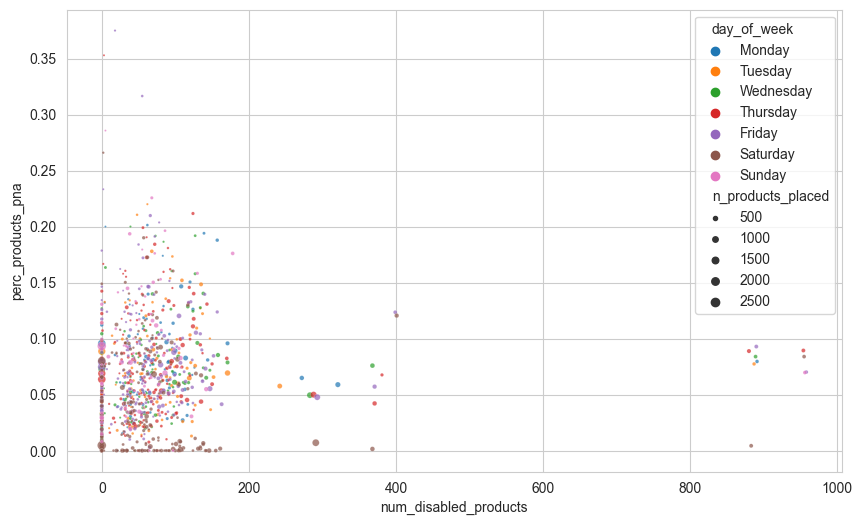

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=test_control_post_20
                ,x='num_disabled_products'
                ,y='perc_products_pna'
                ,size='n_products_placed'
                ,hue='day_of_week'
                ,alpha=0.7
                ,sizes=(2, 40))

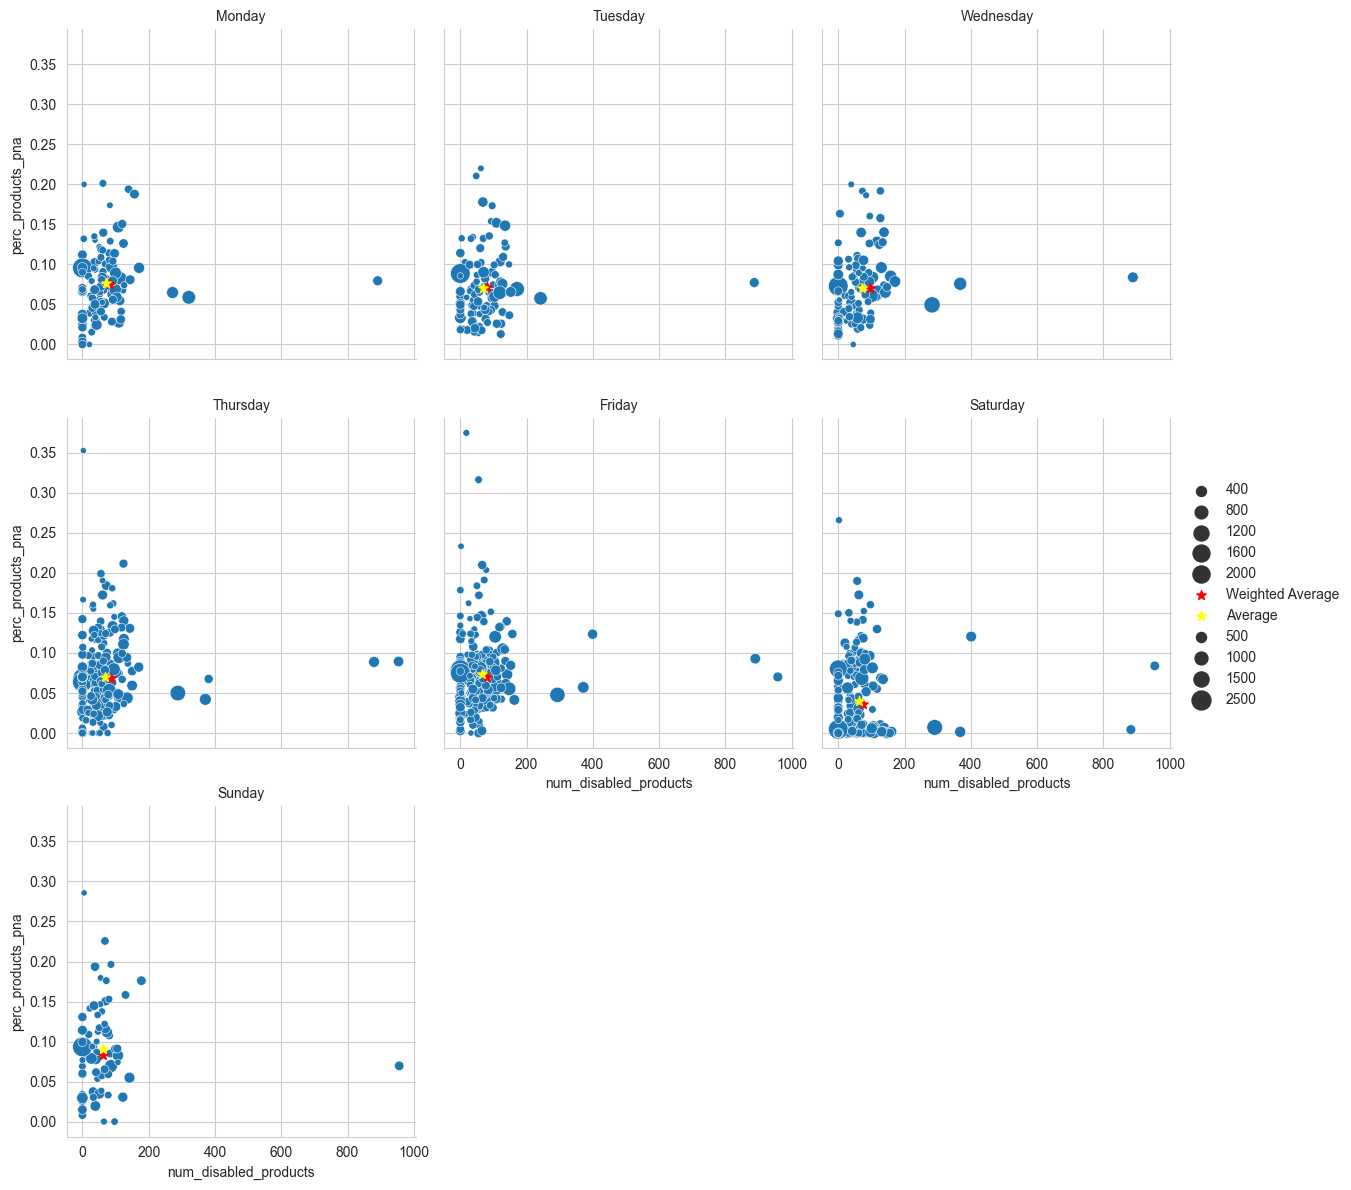

In [23]:
def scatter_with_avg(*args, **kwargs):
    # Regular scatter plot
    sns.scatterplot(*args, **kwargs)
    
    # Extract data being plotted in this facet
    data = kwargs.pop('data')
    
    # Calculate average of x and y dimensions
    avg_x = data['num_disabled_products'].mean()
    avg_y = data['perc_products_pna'].mean()

    # Calculate weighted average of x and y dimensions
    weights = data['n_products_placed']
    weighted_avg_x = (data['num_disabled_products'] * weights).sum() / weights.sum()
    weighted_avg_y = (data['perc_products_pna'] * weights).sum() / weights.sum()

    # Plot the weighted average point (you can customize color, marker, size, etc.)
    plt.scatter(weighted_avg_x, weighted_avg_y, color='red', marker='*', s=50, label='Weighted Average')
    plt.scatter(avg_x, avg_y, color='yellow', marker='*', s=50, label='Average')


g = sns.FacetGrid(test_control_post_20, col='day_of_week', col_wrap=3, height=4)
g.map_dataframe(scatter_with_avg, x='num_disabled_products', y='perc_products_pna',size='n_products_placed',sizes=(20, 200))
g.set_titles('{col_name}')
g.add_legend()
plt.show()


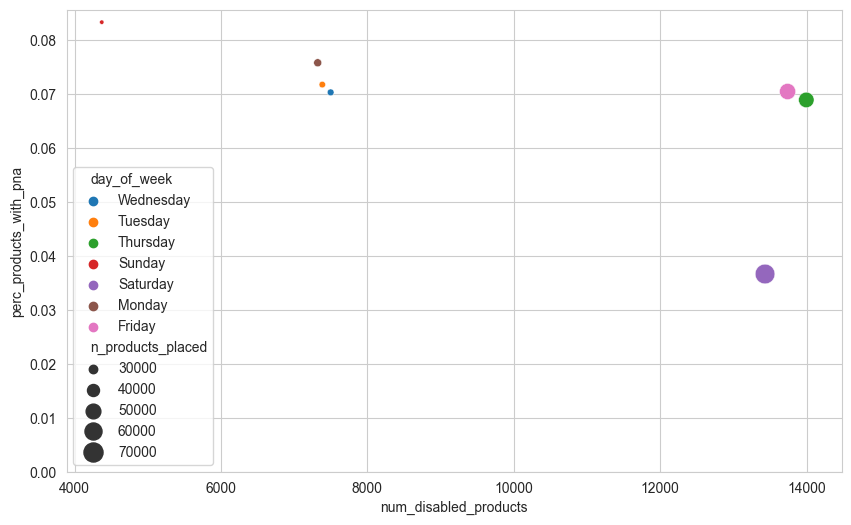

In [25]:
test_control_grouped = test_control_post_20.groupby('day_of_week').agg({
    'num_disabled_products': 'sum'
    ,'n_products_placed': 'sum'
    ,'n_products_with_pna': 'sum'
    ,'n_orders': 'sum'
    ,'store_address_id': 'nunique'
}).reset_index().sort_values('day_of_week', ascending=False)
test_control_grouped.head()
test_control_grouped['perc_products_with_pna'] = test_control_grouped['n_products_with_pna']/test_control_grouped['n_products_placed']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=test_control_grouped
                ,x='num_disabled_products'
                ,y='perc_products_with_pna'
                ,size='n_products_placed'
                ,hue='day_of_week'
                ,sizes=(10, 200))

# Ensuring y-axis starts at 0
plt.ylim(0, plt.ylim()[1])
plt.show()

c:\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args 

<module 'matplotlib.pyplot' from 'c:\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

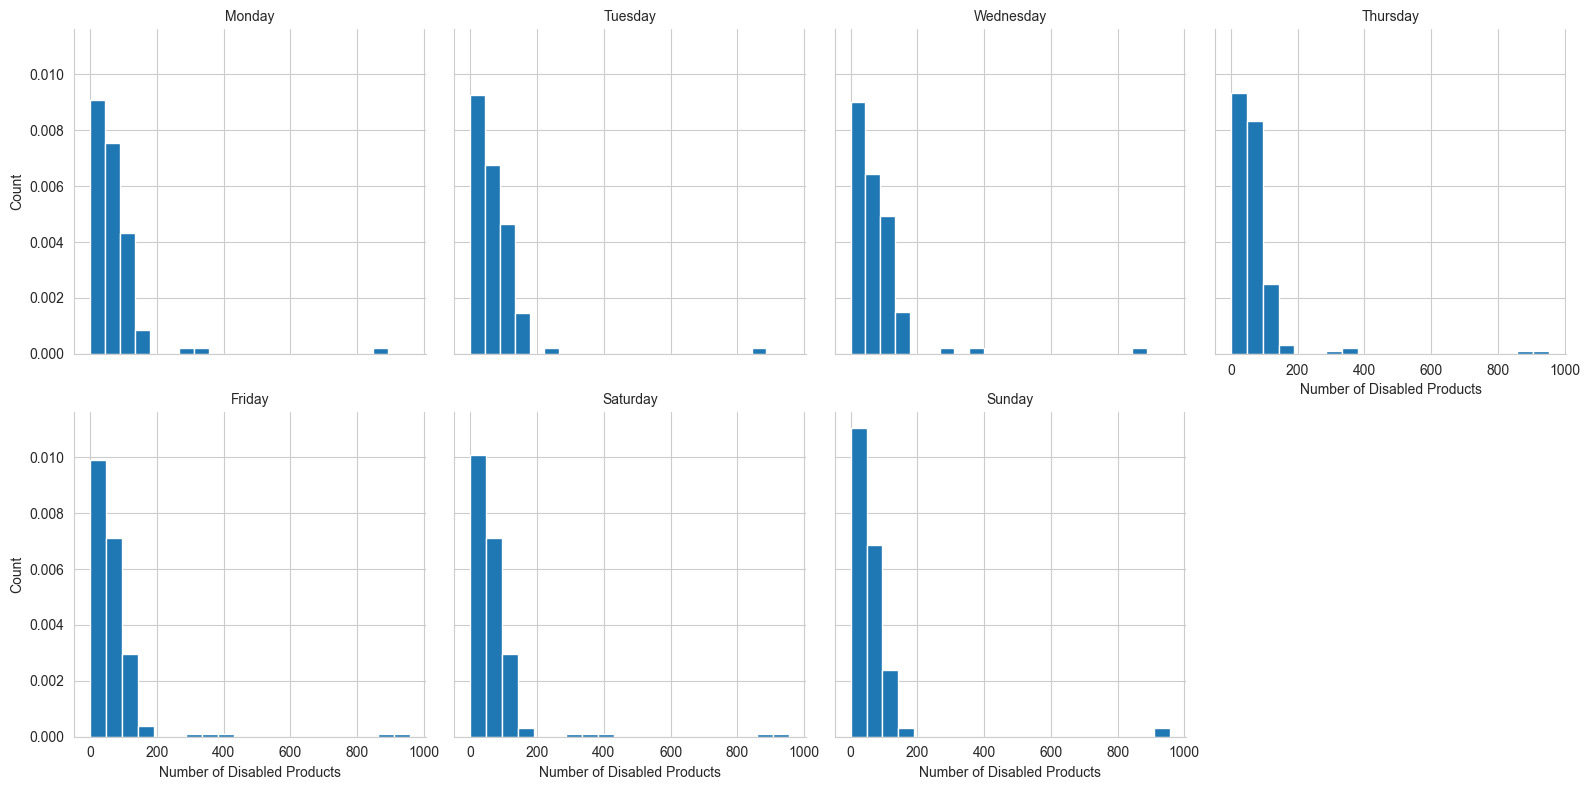

In [26]:
g = sns.FacetGrid(test_control_post_20, col='day_of_week', col_wrap=4, height=4)
g.map(plt.hist, 'num_disabled_products', bins=20, density=True)
g.set_titles('{col_name}')
g.set_axis_labels('Number of Disabled Products', 'Count')

plt.tight_layout()
plt


c:\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args 

<module 'matplotlib.pyplot' from 'c:\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

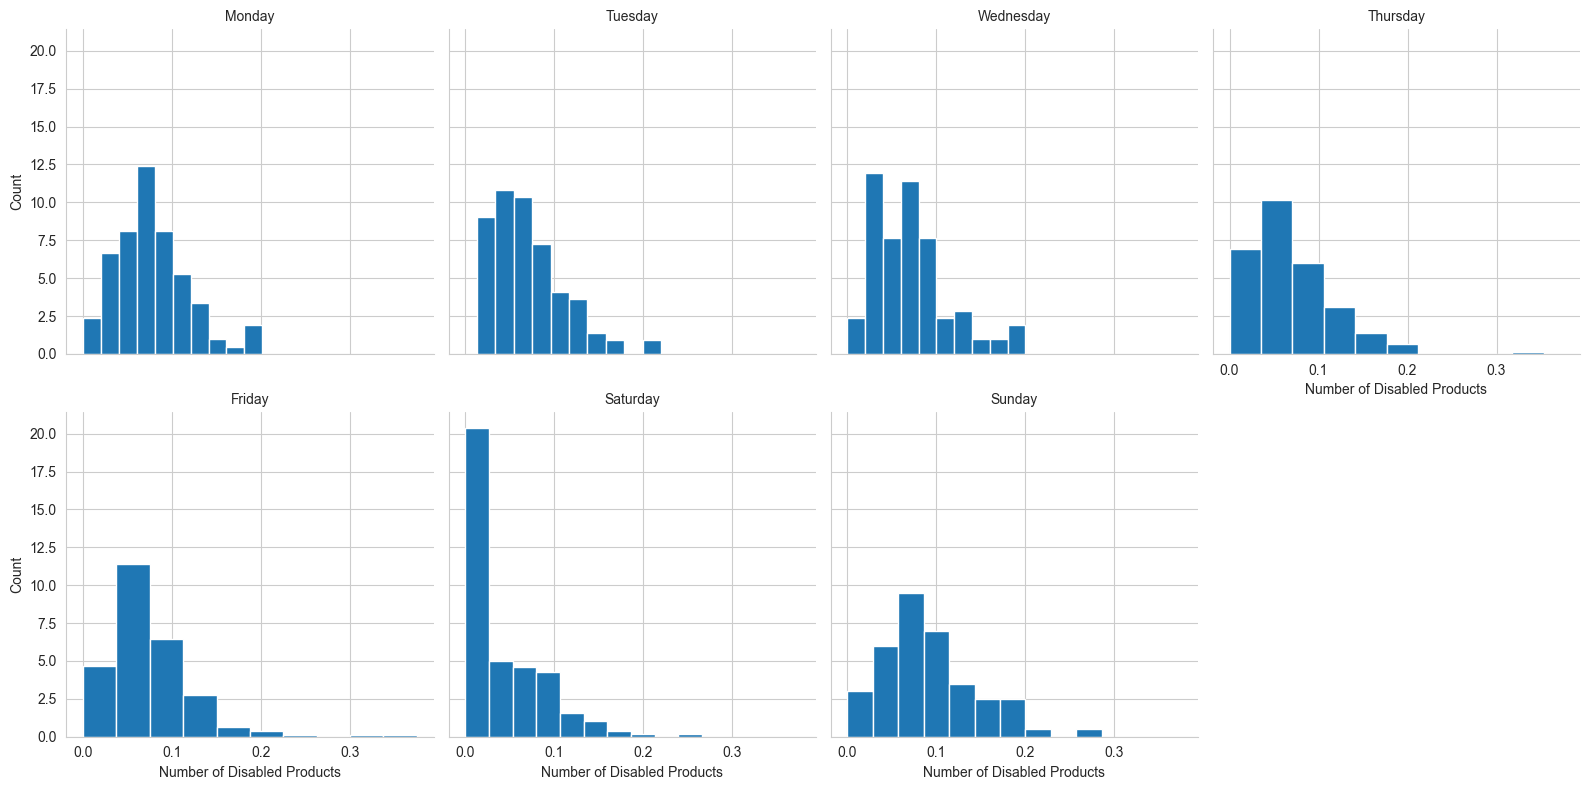

In [27]:
g = sns.FacetGrid(test_control_post_20, col='day_of_week', col_wrap=4, height=4)
g.map(plt.hist, 'perc_products_pna', bins=10, density=True)
g.set_titles('{col_name}')
g.set_axis_labels('Number of Disabled Products', 'Count')

plt.tight_layout()
plt


In [28]:
corr_matrix = test_control_grouped.corr()
corr_matrix

C:\Users\Jordi Cremades\AppData\Local\Temp\ipykernel_23344\378972919.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = test_control_grouped.corr()


,num_disabled_products,n_products_placed,n_products_with_pna,n_orders,store_address_id,perc_products_with_pna
num_disabled_products,1.000000,0.915591,0.876256,0.946905,0.657732,-0.623241
n_products_placed,0.915591,1.000000,0.718067,0.990074,0.478153,-0.817643
n_products_with_pna,0.876256,0.718067,1.000000,0.804319,0.399387,-0.208681
n_orders,0.946905,0.990074,0.804319,1.000000,0.462676,-0.733884
store_address_id,0.657732,0.478153,0.399387,0.462676,1.000000,-0.502424
perc_products_with_pna,-0.623241,-0.817643,-0.208681,-0.733884,-0.502424,1.000000
